# CLS study

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

## Loading the data (from npy files)

We will load the data we created thanks to the *data_cls.py* file.

In [2]:
# FlauBERT data
with open('numpy_save/flaubert_raw_layer_12.npy', 'rb') as f:
    train_fl_12 = np.load(f)
    train_label_fl_12 = np.load(f)
    test_fl_12 = np.load(f)
    test_label_fl_12 = np.load(f)

with open('numpy_save/flaubert_raw_layer_13.npy', 'rb') as f:
    train_fl_13 = np.load(f)
    train_label_fl_13 = np.load(f)
    test_fl_13 = np.load(f)
    test_label_fl_13 = np.load(f)

with open('numpy_save/flaubert_ft.npy', 'rb') as f:
    train_fl_ft = np.load(f)
    train_label_fl_ft = np.load(f)
    test_fl_ft = np.load(f)
    test_label_fl_ft = np.load(f)

In [3]:
# CamemBERT data
with open('numpy_save/camembert_raw_layer_12.npy', 'rb') as f:
    train_cb_12 = np.load(f)
    train_label_cb_12 = np.load(f)
    test_cb_12 = np.load(f)
    test_label_cb_12 = np.load(f)

with open('numpy_save/camembert_raw_layer_13.npy', 'rb') as f:
    train_cb_13 = np.load(f)
    train_label_cb_13 = np.load(f)
    test_cb_13 = np.load(f)
    test_label_cb_13 = np.load(f)

with open('numpy_save/camembert_ft.npy', 'rb') as f:
    train_cb_ft = np.load(f)
    train_label_cb_ft = np.load(f)
    test_cb_ft = np.load(f)
    test_label_cb_ft = np.load(f)

## Construction of the keras model

In [4]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input
from tensorflow.keras import optimizers

In [5]:
def visu_perf_model(history: tensorflow.keras.callbacks.History
                    ) -> matplotlib.figure.Figure:
    # Get training and test loss histories
    training_loss = history.history["loss"]
    test_loss = history.history["val_loss"]
    # Create count of the number of epochs
    epoch_count = range(1, len(training_loss) + 1)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

    # --> visualisation of the loss
    ax1.plot(epoch_count, training_loss, "r--")
    ax1.plot(epoch_count, test_loss, "b-")
    ax1.legend(["Training Loss", "Test Loss"])
    ax1.set(xlabel="Epoch", ylabel="Loss")
    ax1.set_title("LOSS VISU")

    # --> visualisation of the accuracy
    training_accuracy = history.history["accuracy"]
    test_accuracy = history.history["val_accuracy"]

    ax2.plot(epoch_count, training_accuracy, "r--")
    ax2.plot(epoch_count, test_accuracy, "b-")
    # Visualize accuracy history
    ax2.legend(["Training Accuracy", "Test Accuracy"])
    ax2.set(xlabel="Epoch", ylabel="Accuracy")
    ax2.set_title("ACC VISU")

    return fig

In [6]:
def class_head(x_train, y_train,
               x_test, y_test,
               lr: float = 0.001,
               tp: str = "XML"):
    # creation of the model
    # here it is a simple logistic regression
    model = Sequential()
    model.add(Input(shape=(768,)))
    if tp == "RoBERTa":
        # roberta class Head : 1 layer with tanh act
        model.add(Dense(units=768, activation="tanh"))

    model.add(Dense(units=1, activation="sigmoid"))

    opt = optimizers.Adam(learning_rate=lr)

    model.compile(loss="binary_crossentropy",
                  optimizer=opt,
                  metrics=["accuracy"])

    model.summary()

    history = model.fit(x_train,
                        y_train,
                        epochs=30,
                        verbose=1,
                        batch_size=32,
                        validation_data=(x_test, y_test),
                        )

    fig = visu_perf_model(history)

    return model, fig

## The study

### For FlauBERT

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 769       
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
188/188 [==============================] - 2s 7ms/step - loss: 0.6685 - accuracy: 0.5971 - val_loss: 0.5907 - val_accuracy: 0.6929
Epoch 2/30
188/188 [==============================] - 1s 3ms/step - loss: 0.5822 - accuracy: 0.7024 - val_loss: 0.5685 - val_accuracy: 0.7145
Epoch 3/30
188/188 [==============================] - 0s 2ms/step - loss: 0.5558 - accuracy: 0.7252 - val_loss: 0.5576 - val_accuracy: 0.7165
Epoch 4/30
188/188 [==============================] - 1s 3ms/step - loss: 0.5570 - accuracy: 0.7193 - val_loss: 0.5604 - val_accuracy: 0.7148
Epoch 5/30
188/188 [==============================] - 0s 3ms/step - loss: 0.5451 -

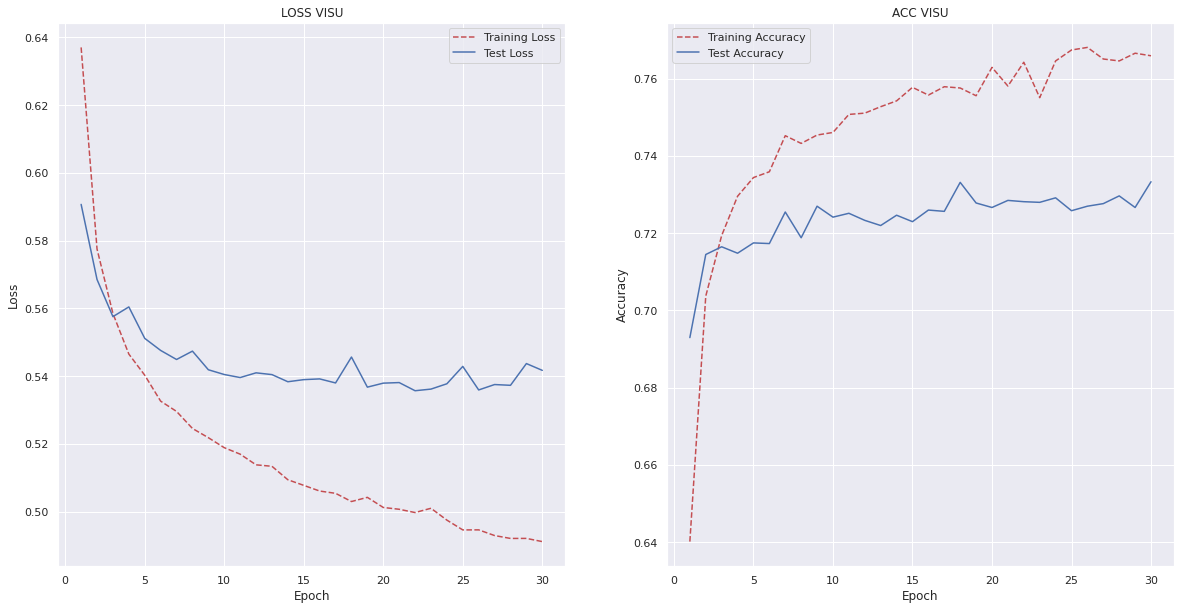

In [12]:
# embedding on the layer 12 (penultimate) on the pre-trained model.
m, f = class_head(train_fl_12, train_label_fl_12, test_fl_12, test_label_fl_12)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 769       
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
188/188 [==============================] - 1s 5ms/step - loss: 0.7074 - accuracy: 0.5773 - val_loss: 0.5817 - val_accuracy: 0.7035
Epoch 2/30
188/188 [==============================] - 1s 3ms/step - loss: 0.5726 - accuracy: 0.7019 - val_loss: 0.5645 - val_accuracy: 0.7131
Epoch 3/30
188/188 [==============================] - 1s 3ms/step - loss: 0.5514 - accuracy: 0.7242 - val_loss: 0.5546 - val_accuracy: 0.7226
Epoch 4/30
188/188 [==============================] - 1s 3ms/step - loss: 0.5187 - accuracy: 0.7460 - val_loss: 0.5511 - val_accuracy: 0.7143
Epoch 5/30
188/188 [==============================] - 1s 4ms/step - loss: 0.5167 -

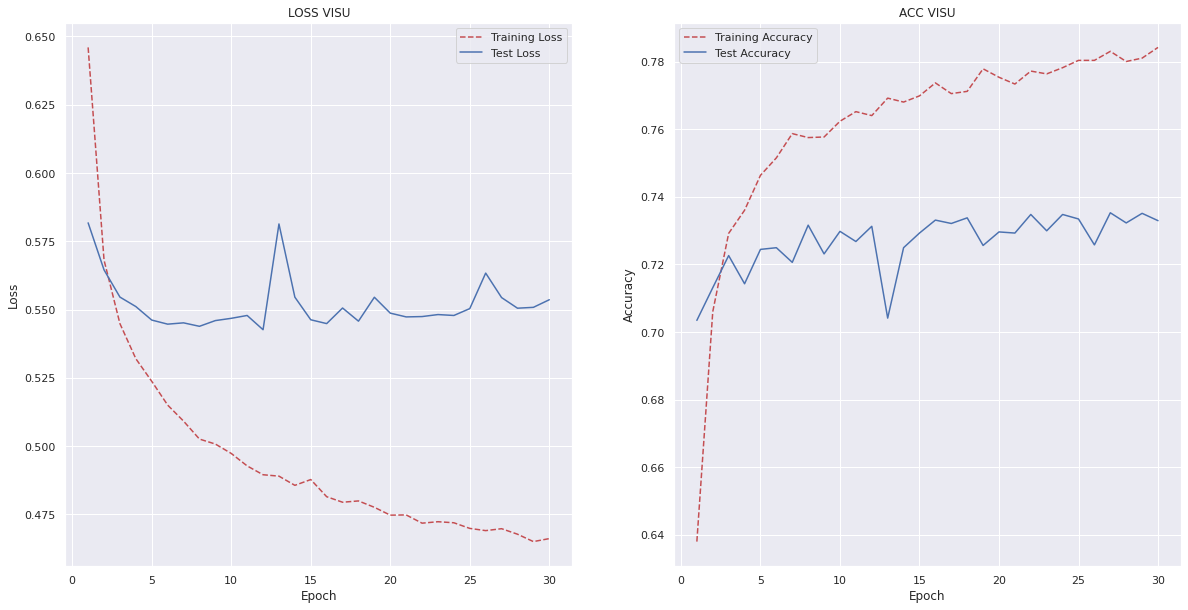

In [13]:
# embedding on the last layer of the pre-trained model
m, f = class_head(train_fl_13, train_label_fl_13, test_fl_13, test_label_fl_13)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1)                 769       
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
188/188 [==============================] - 1s 5ms/step - loss: 0.2815 - accuracy: 0.8929 - val_loss: 0.1981 - val_accuracy: 0.9307
Epoch 2/30
188/188 [==============================] - 1s 3ms/step - loss: 0.1552 - accuracy: 0.9490 - val_loss: 0.1952 - val_accuracy: 0.9305
Epoch 3/30
188/188 [==============================] - 1s 3ms/step - loss: 0.1700 - accuracy: 0.9423 - val_loss: 0.2114 - val_accuracy: 0.9298
Epoch 4/30
188/188 [==============================] - 0s 2ms/step - loss: 0.1454 - accuracy: 0.9491 - val_loss: 0.1930 - val_accuracy: 0.9302
Epoch 5/30
188/188 [==============================] - 0s 2ms/step - loss: 0.1545 -

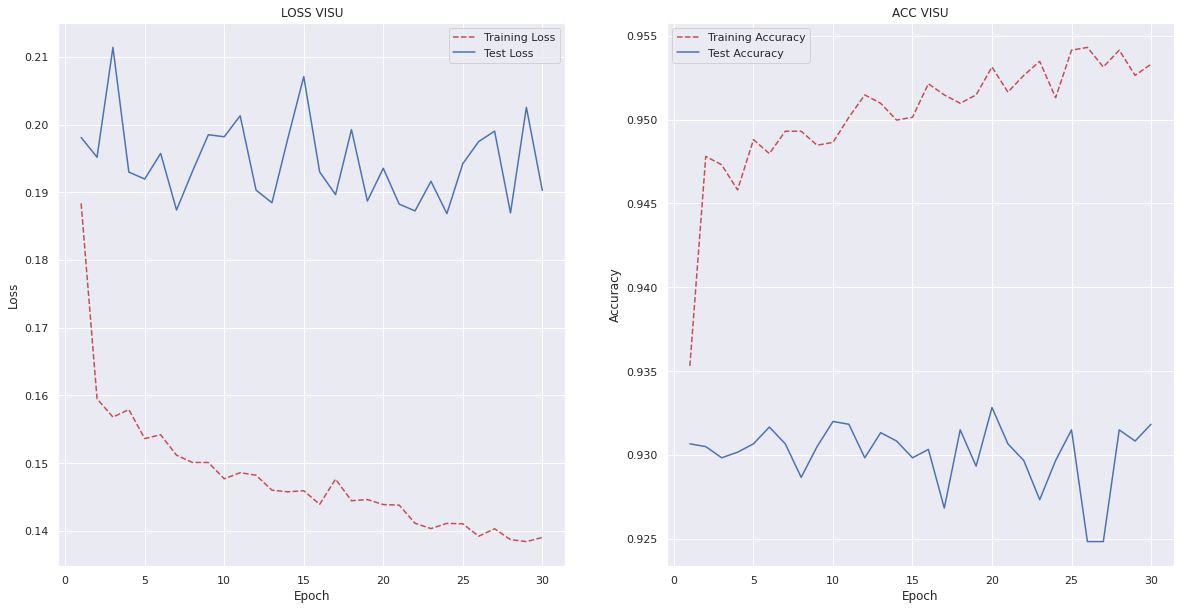

In [14]:
# Embedding on the last layer of the fine tuned model
m, f = class_head(train_fl_ft, train_label_fl_ft, test_fl_ft, test_label_fl_ft)

### For CamemBERT

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1)                 769       
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
188/188 [==============================] - 1s 5ms/step - loss: 0.6928 - accuracy: 0.5067 - val_loss: 0.6911 - val_accuracy: 0.5516
Epoch 2/30
188/188 [==============================] - 0s 2ms/step - loss: 0.6908 - accuracy: 0.5431 - val_loss: 0.6896 - val_accuracy: 0.5469
Epoch 3/30
188/188 [==============================] - 0s 2ms/step - loss: 0.6899 - accuracy: 0.5313 - val_loss: 0.6883 - val_accuracy: 0.5476
Epoch 4/30
188/188 [==============================] - 0s 2ms/step - loss: 0.6878 - accuracy: 0.5561 - val_loss: 0.6866 - val_accuracy: 0.5826
Epoch 5/30
188/188 [==============================] - 0s 2ms/step - loss: 0.6867 -

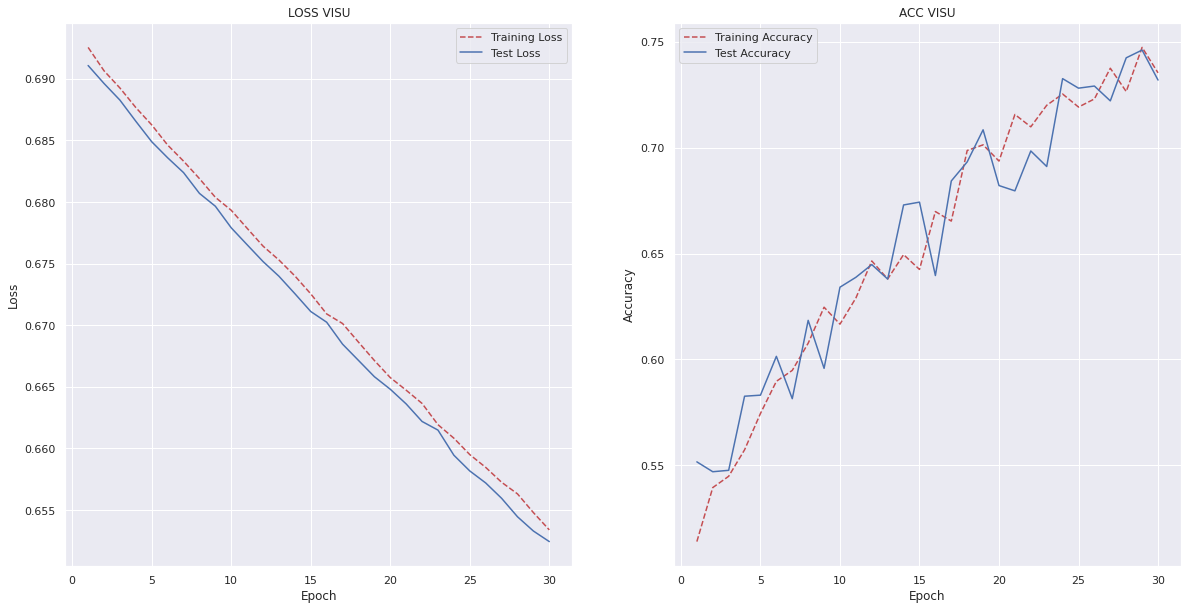

In [15]:
# embeddings on the layer 12 (penultimate) on the pre-trained model.
m, f = class_head(train_cb_12, train_label_cb_12, test_cb_12, test_label_cb_12)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 769       
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
188/188 [==============================] - 1s 6ms/step - loss: 0.6731 - accuracy: 0.6042 - val_loss: 0.6188 - val_accuracy: 0.7493
Epoch 2/30
188/188 [==============================] - 0s 3ms/step - loss: 0.6050 - accuracy: 0.7561 - val_loss: 0.5665 - val_accuracy: 0.8063
Epoch 3/30
188/188 [==============================] - 1s 3ms/step - loss: 0.5555 - accuracy: 0.8042 - val_loss: 0.5266 - val_accuracy: 0.8321
Epoch 4/30
188/188 [==============================] - 1s 4ms/step - loss: 0.5162 - accuracy: 0.8297 - val_loss: 0.4958 - val_accuracy: 0.8415
Epoch 5/30
188/188 [==============================] - 0s 2ms/step - loss: 0.4910 -

(<tensorflow.python.keras.engine.sequential.Sequential at 0x7f2e30270b10>,
 <Figure size 1440x720 with 2 Axes>)

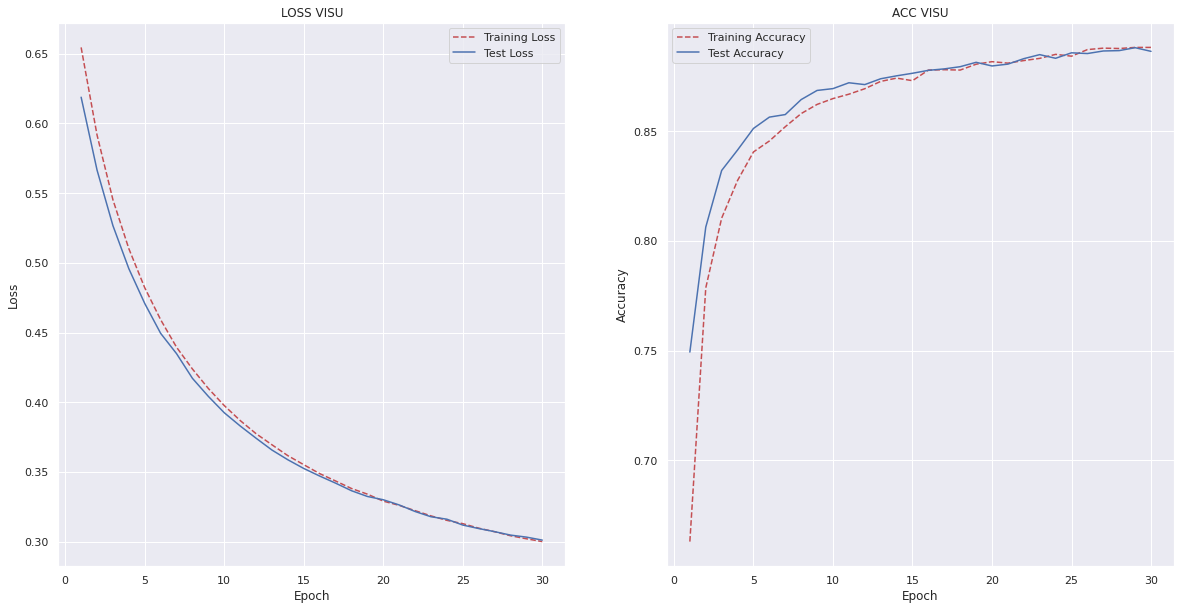

In [9]:
# embedding of the pretrained model on the last layer
class_head(train_cb_13, train_label_cb_13, test_cb_13, test_label_cb_13)

**Note** : With the embedding of the final layer of CamemBERT we have really good performance in the binary classification task with a simple classification head (simple logistic regression without any dropout or any specific tools), and with the previous experience we can see that the embedding of the network camemBERT allow us to reach very good performance in the classification task. There is something in the geometry of these embeddings that allow us to have better performance in the classification tasks.

Now we will use the embeddings of the fine tuned model.

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 1)                 769       
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
188/188 [==============================] - 1s 5ms/step - loss: 0.2433 - accuracy: 0.9592 - val_loss: 0.1779 - val_accuracy: 0.9440
Epoch 2/30
188/188 [==============================] - 0s 3ms/step - loss: 0.1395 - accuracy: 0.9579 - val_loss: 0.1758 - val_accuracy: 0.9445
Epoch 3/30
188/188 [==============================] - 0s 3ms/step - loss: 0.1344 - accuracy: 0.9578 - val_loss: 0.1733 - val_accuracy: 0.9442
Epoch 4/30
188/188 [==============================] - 1s 4ms/step - loss: 0.1312 - accuracy: 0.9593 - val_loss: 0.1721 - val_accuracy: 0.9437
Epoch 5/30
188/188 [==============================] - 1s 3ms/step - loss: 0.1347 -

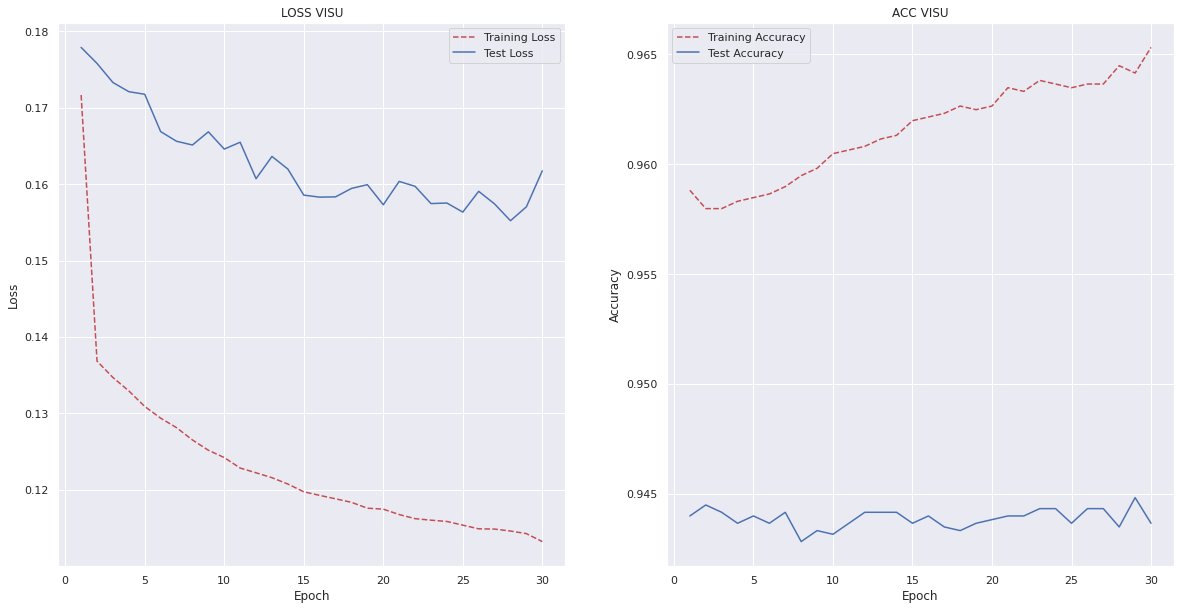

In [16]:
# embedding on the last layer on the fine tuned model
m, f = class_head(train_cb_ft, train_label_cb_13, test_cb_ft, test_label_cb_ft)

Here we try with a RoBERTa classification head which is the one that is normally on top of the CamembertForSequenceClassification.

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 768)               590592    
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 769       
Total params: 591,361
Trainable params: 591,361
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
188/188 [==============================] - 3s 11ms/step - loss: 0.3499 - accuracy: 0.9601 - val_loss: 0.1817 - val_accuracy: 0.9447
Epoch 2/30
188/188 [==============================] - 1s 7ms/step - loss: 0.1512 - accuracy: 0.9565 - val_loss: 0.1772 - val_accuracy: 0.9447
Epoch 3/30
188/188 [==============================] - 1s 5ms/step - loss: 0.1439 - accuracy: 0.9555 - val_loss: 0.1775 - val_accuracy: 0.9443
Epoch 4/30
188/188 [==============================] - 2s 9ms/step - loss: 0.1495 -

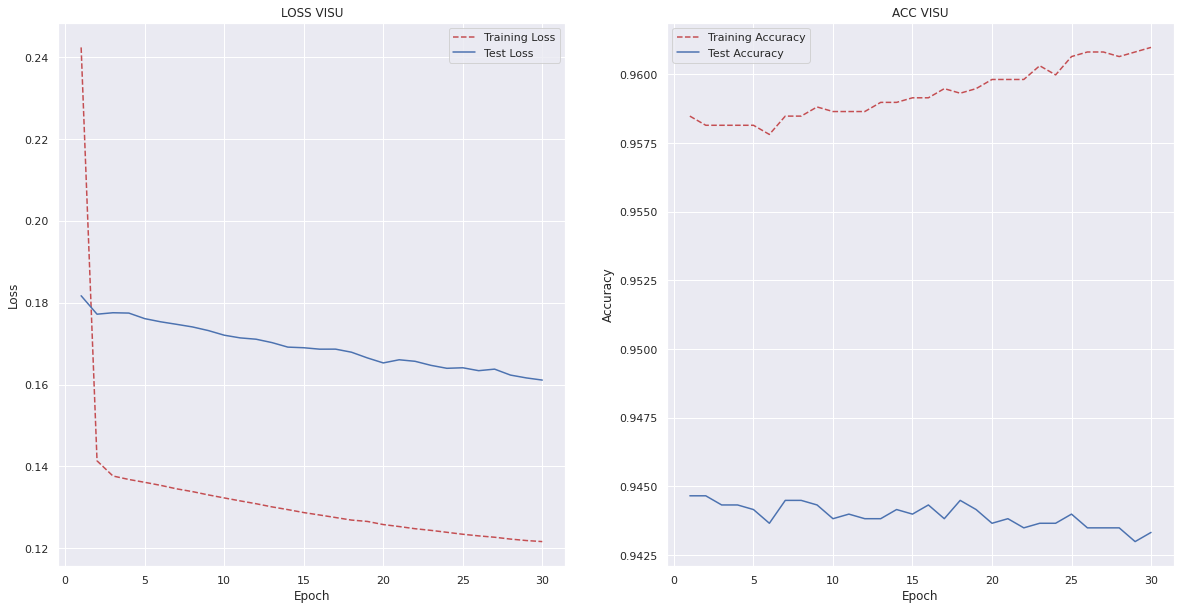

In [17]:
m, f = class_head(train_cb_ft, train_label_cb_13, test_cb_ft, test_label_cb_ft,
                  lr=0.00001,
                  tp="RoBERTa")